# EDA - DS 3201

## Playing with data

In [8]:
import pandas as pd

df = pd.read_csv('../data/iowa.csv')

df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


In [20]:
df_drink = df[['Bottles Sold','Item Description']]
df_drink['Item Description'].value_counts()

Item Description
BLACK VELVET                                 3994
HAWKEYE VODKA                                3460
TITOS HANDMADE VODKA                         2648
FIREBALL CINNAMON WHISKEY                    2500
FIVE O'CLOCK VODKA                           2013
                                             ... 
DEKUYPER SOUR APPLE PUCKER MINI                 1
PEARL ORANGE VODKA                              1
SOHO LYCHEE                                     1
SALVADORS CLASSIC MARGARITA 4PK SLIM CANS       1
1792 PORT FINISH BOURBON HA                     1
Name: count, Length: 5401, dtype: int64

In [23]:
df_drink_grouped = df_drink.groupby('Item Description').sum().reset_index()
df_drink_grouped = df_drink_grouped.sort_values(by='Bottles Sold', ascending=False)
df_drink_grouped.head()

,Item Description,Bottles Sold
1854,FIREBALL CINNAMON WHISKEY,97308
636,BLACK VELVET,76184
5022,TITOS HANDMADE VODKA,57263
2349,HAWKEYE VODKA,53675
1904,FIVE O'CLOCK VODKA,27072


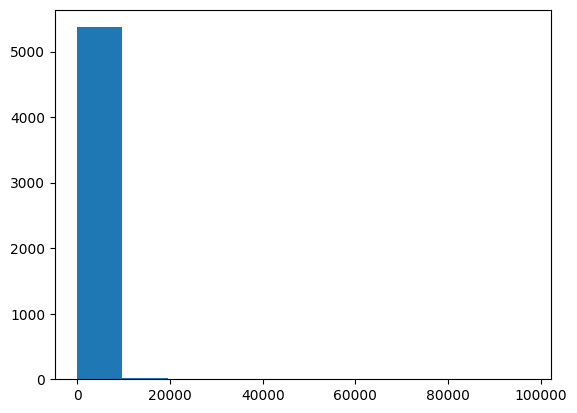

In [26]:
import matplotlib.pyplot as plt

plt.hist(df_drink_grouped['Bottles Sold'], bins=10)
plt.show()

Interestingly, no matter how many bins you choose, the distibution will not be affected very much because the vast majority of drinks have so many fewer bottles sold compared to Fireball and, to a lesser extent, Black Velvet.

## Checking for NANs

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159904 entries, 0 to 159903
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Invoice/Item Number  159904 non-null  object 
 1   Date                 159904 non-null  object 
 2   Store Number         159904 non-null  int64  
 3   Store Name           159904 non-null  object 
 4   Zip Code             159508 non-null  object 
 5   Category Name        159771 non-null  object 
 6   Vendor Name          159904 non-null  object 
 7   Item Number          159904 non-null  int64  
 8   Item Description     159904 non-null  object 
 9   Bottle Volume (ml)   159904 non-null  int64  
 10  State Bottle Cost    159904 non-null  float64
 11  State Bottle Retail  159904 non-null  float64
 12  Bottles Sold         159904 non-null  int64  
 13  Sale (Dollars)       159904 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory usage: 17.1+ MB


In [29]:
df.isna().sum()

Invoice/Item Number      0
Date                     0
Store Number             0
Store Name               0
Zip Code               396
Category Name          133
Vendor Name              0
Item Number              0
Item Description         0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
dtype: int64

There only seem to be missing values in `Zip Code` and `Category Name`. This doesn't seem to align with any row patterns, so it isn't an issue with individual data entries. So, if we decide to analyze either of these two variables, it may be problematic - but if we aren't, we can probably just not use those columns in our analysis.